In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Classification/Diabetes_Data.csv"
data = pd.read_csv(url)
data

,Age,Weight,BloodSugar,Gender,Diabetes
0,25,119,130.8,男生,1
1,66,102,128.1,女生,1
2,59,65,103.9,男生,0
3,46,117,94.8,女生,0
4,45,79,57.8,男生,0
...,...,...,...,...,...
395,72,63,97.1,女生,0
396,22,117,156.7,女生,1
397,31,76,119.0,男生,0
398,36,65,96.3,女生,1


In [2]:
# 貼前面寫過的來用
data["Gender"] = data["Gender"].map({"男生": 1, "女生": 0})
data

,Age,Weight,BloodSugar,Gender,Diabetes
0,25,119,130.8,1,1
1,66,102,128.1,0,1
2,59,65,103.9,1,0
3,46,117,94.8,0,0
4,45,79,57.8,1,0
...,...,...,...,...,...
395,72,63,97.1,0,0
396,22,117,156.7,0,1
397,31,76,119.0,1,0
398,36,65,96.3,0,1


In [3]:
# 貼前面寫過的來用
# 分成訓練集與測試集
from sklearn.model_selection import train_test_split
x = data[["Age",	"Weight",	"BloodSugar", "Gender"]]
y = data["Diabetes"]
# 兩成測試集, 固定分割的方式random_state = ?(數字)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 87)
# 原先為Pandas 的形式方便閱讀, 將其用Numpy轉換為矩陣形式方便計算
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [4]:
# 貼前面寫過的來用
# 用Feature Scaling 做加速, 減少迭代更新到近最低點所需的次數, 功能像是幫各個x 做Normalize
from sklearn.preprocessing import StandardScaler
# 這裡是做標準化Standardization
scaler = StandardScaler() # 創建一名稱為scalar 的類別
scaler.fit(x_train) # 再讓它看過訓練集的特徵資料(.fit)
x_train = scaler.transform(x_train)
# 注意我們不能算測試集的平均值, 變異數, 標準差來做Normalize, 直接使用前面訓練集的
x_test = scaler.transform(x_test)

In [5]:
# Sigmoid Function
import numpy as np
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [6]:
# 用Binary Cross Entropy 做Cost Function
w = np.array([1, 2, 3, 4])
b = 1
z = (w*x_train).sum(axis=1) + b
y_pred = sigmoid(z)
# 公式: Cost = -y*log(y_pred) - (1-y)*log(1-y_pred)
cost = -y_train*np.log(y_pred) - (1-y_train)*np.log(1-y_pred)
cost.mean()

1.3959515636868534

In [7]:
# 定義compute_cost 函式
def compute_cost(x, y, w, b):
  z = (w*x).sum(axis=1) + b
  y_pred = sigmoid(z)
  cost = -y*np.log(y_pred) - (1-y)*np.log(1-y_pred)
  cost = cost.mean()
  return cost

In [8]:
w = np.array([1, 4, 2, 4])
b = 2
compute_cost(x_train, y_train, w, b)

1.9542777292019753

In [9]:
# 計算各個方向的斜率
# 貼前面寫過的來用
# 設定optimizer - Gradient Descent
z = (w*x_train).sum(axis=1) + b
y_pred = sigmoid(z)
b_gradient = (y_pred - y_train).mean()
# x_train.shape 告訴我們x_train 大小, 我們要x_train.shape 當中第二個值的大小的0矩陣, 故[1]
w_gradient = np.zeros(x_train.shape[1])

for i in range(x_train.shape[1]):
  w_gradient[i] = (x_train[:, i]*(y_pred - y_train)).mean()

w_gradient, b_gradient

(array([ 0.04176112,  0.13246515, -0.12945482,  0.21952511]),
 0.29409673395976715)

In [10]:
# 貼前面寫過的來用
# 定義compute_gradient 函式
def compute_gradient(x, y, w, b):
  z = (w*x).sum(axis=1) + b
  y_pred = sigmoid(z)
  w_gradient = np.zeros(x.shape[1])
  b_gradient = (y_pred - y).mean()
  for i in range(x.shape[1]):
    w_gradient[i] = (x[:, i]*(y_pred - y)).mean()
  return w_gradient, b_gradient

In [11]:
w = np.array([1, 2, 2, 3])
b = 5
compute_gradient(x_train, y_train, w, b)

(array([ 0.02951124, -0.00123345, -0.20911372,  0.15024735]),
 0.518806798216479)

In [12]:
# 貼前面寫過的來用
# Learning Rate
w = np.array([1, 2, 2, 3])
b = 5
learning_rate = 1
print(compute_cost(x_train, y_train, w, b))
w_gradient, b_gradient = compute_gradient(x_train, y_train, w, b)
w = w - w_gradient*learning_rate
b = b - b_gradient*learning_rate
w, b
print(compute_cost(x_train, y_train, w, b))

2.8154062345431683
2.487342502355539


In [13]:
# 貼前面寫過的來用
# 定義Gradient Descent 的function
def gradient_descent(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, iter_times, print_iter=1000):
  # hist 是用來儲存cost, w, b 的列表
  c_hist = []
  w_hist = []
  b_hist = []

  w = w_init
  b = b_init

  # 建立一for 迴圈進行iter_times 次迭代
  for i in range(iter_times):
    # w_gradient, b_gradient = compute_gradient(x, y, w, b)
    w_gradient, b_gradient = gradient_function(x, y, w, b)
    w = w - w_gradient*learning_rate
    b = b - b_gradient*learning_rate
    # cost = compute_cost(x, y, w, b)
    cost = cost_function(x, y, w, b)

    w_hist.append(w)
    b_hist.append(b)
    c_hist.append(cost)

    if i%print_iter==0:
      # .4f:小數點後4 位，.4e: 小數點後4 位+科學符號，加空格處理負號問題
      print(f"Iteration {i:5} : Cost:{cost:.2e}, w:{w}, b:{b: .2e}, w_gradient:{w_gradient}, b_gradient:{b_gradient: .2e}")

  return w, b, w_hist, b_hist, c_hist

In [14]:
# 貼前面寫過的來用
w_init = np.array([1, 2, 2, 3])
b_init = 5
learning_rate = 1
iter_times=10000
#把函式當參數傳入: cost_function -> compute_cost, gradient_function -> compute_gradient, print_iter 已經設定好1000 故無須再設定
w_final, b_final, w_hist, b_hist, c_hist = gradient_descent(x_train, y_train, w_init, b_init, learning_rate, compute_cost, compute_gradient, iter_times)

# 注意: 上方.2e 是numpy 的矩陣格式，遇到錯誤可能會需要移除

Iteration     0 : Cost:2.49e+00, w:[0.97048876 2.00123345 2.20911372 2.84975265], b: 4.48e+00, w_gradient:[ 0.02951124 -0.00123345 -0.20911372  0.15024735], b_gradient: 5.19e-01
Iteration  1000 : Cost:2.30e-01, w:[-0.25306231 -0.30570743  4.61659294 -0.1577436 ], b:-2.24e+00, w_gradient:[ 5.35611250e-07  1.44242331e-06 -7.74394539e-06  4.51249667e-07], b_gradient: 3.32e-06
Iteration  2000 : Cost:2.30e-01, w:[-0.25313735 -0.30590951  4.61767786 -0.15780681], b:-2.24e+00, w_gradient:[ 4.39673180e-10  1.18411720e-09 -6.35737891e-09  3.70427654e-10], b_gradient: 2.73e-09
Iteration  3000 : Cost:2.30e-01, w:[-0.25313741 -0.30590968  4.61767875 -0.15780687], b:-2.24e+00, w_gradient:[ 3.61169428e-13  9.72699005e-13 -5.22218969e-12  3.04285763e-13], b_gradient: 2.24e-12
Iteration  4000 : Cost:2.30e-01, w:[-0.25313741 -0.30590968  4.61767876 -0.15780687], b:-2.24e+00, w_gradient:[ 2.98372438e-16  8.00748357e-16 -4.30072644e-15  2.44249065e-16], b_gradient: 1.92e-15
Iteration  5000 : Cost:2.30e-0

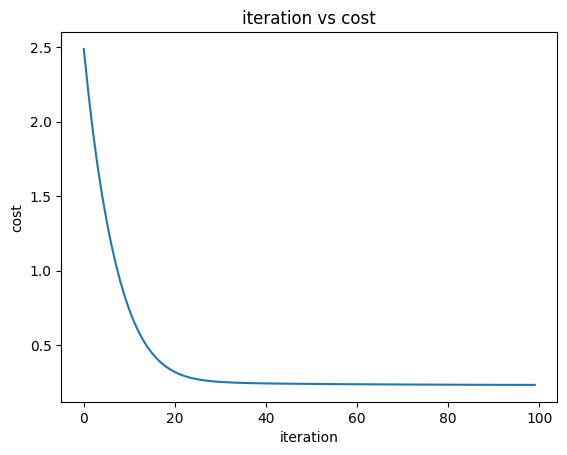

In [15]:
# 貼前面寫過的來用
# 畫c_hist 圖
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(0, 100), c_hist[:100]) # 前100 筆資料
plt.title("iteration vs cost")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()

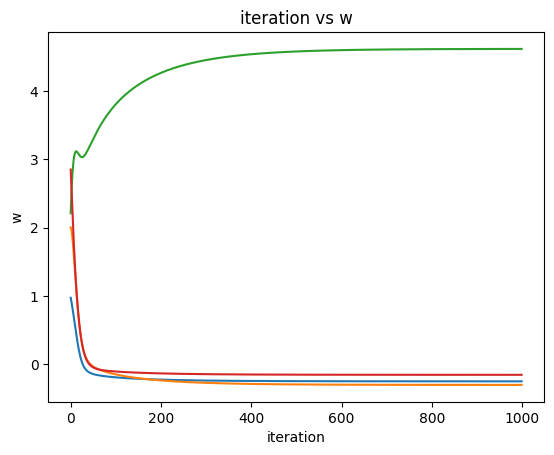

In [16]:
# 貼前面寫過的來用
# 畫w_hist 圖
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(0, 1000), w_hist[:1000]) # 前1000 筆資料
plt.title("iteration vs w")
plt.xlabel("iteration")
plt.ylabel("w")
plt.show()

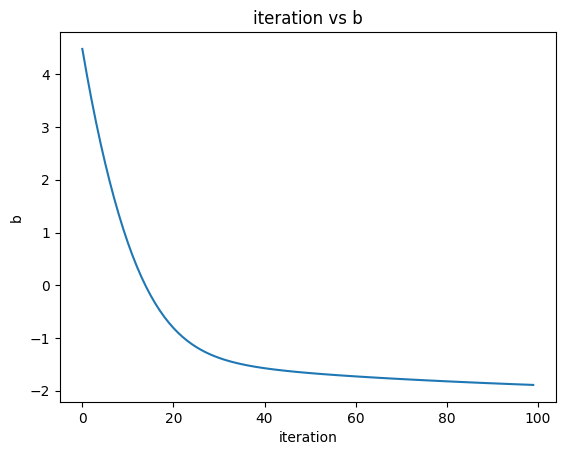

In [17]:
# 貼前面寫過的來用
# 畫b_hist 圖
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(0, 100), b_hist[:100]) # 前100 筆資料
plt.title("iteration vs b")
plt.xlabel("iteration")
plt.ylabel("b")
plt.show()

In [18]:
w_final, b_final

(array([-0.25313741, -0.30590968,  4.61767876, -0.15780687]),
 -2.2423167596289706)

In [19]:
# 用測試集驗證成果
z = (w_final*x_test).sum(axis=1) + b_final
y_pred = sigmoid(z)
# 以數值0.5 當作Thershold 來驗證最後的值 > 0.5 是1(T) , < 0.5 是0(F)
y_pred = np.where(y_pred > 0.5, 1, 0)
# y_pred == y_test, 比較結果是否一致
acc = (y_pred == y_test).sum() / len(y_test) * 100 # 計算正確率
print(f"正確率 {acc}%")

正確率 90.0%


In [20]:
# 72 92 102 女生
# 62 52 120 男生
x_real = np.array([[72, 92, 102, 0], [62, 52, 120, 1]])
x_real = scaler.transform(x_real)
z = (w_final*x_real).sum(axis=1) + b_final
y_real = sigmoid(z)
y_real

array([0.04348214, 0.70827407])

In [21]:
# Scikit-Learn Regression
# 本章主要在教如何使用Sklearn 套件來完成前幾章線性回歸、邏輯回歸與SVM...等功能
# https://scikit-learn.org/stable/
# https://grandmacan.com/courses/WQgj9SntAQ5Vwrk7QpSB/lectures